In [62]:
import warnings
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import json
import operator
import copy, random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')


# Step 0: Provide the path to the experiments

In [65]:
path = "/Users/andra/TUDelft-P1/output 2/"

# Step 1: Rename files 
> **Note**: Only run this if you have new results

In [ ]:
files = []
for folder in os.listdir(path):
    if folder.startswith('.'):
        continue
    for file in os.listdir(path+folder):
        filename = folder+'/'+file
        if filename.endswith(".json"):
            files.append('.'.join(filename.split('.')[:-1]))

for f in files:
    g = f.replace('evCupid','ev__Cupid')
    g = g.replace('__CorrelationClustering','__DistributionBased')
    g = g.replace('evSimilarityFlooding','ev__SimilarityFlooding')
    g = g.replace('evJaccardLevenMatcher','ev__JaccardLevenMatcher')
    if 'COMA_OPT_INST' in g:
        g = g.replace('__Coma','__COMA-SI')
    else:
        g = g.replace('__Coma','__COMA-S')


#     print(g)
    os.rename(path+f+'.json',path+g+'.json')

# Step 2: Read files


Parse the result files and present a table with the precision and recall metrics for all the experiments

for every algorithm create a plot for each metric

Code below read the output of the framework and creates a dict of metrics.

In [66]:

total_metrics = {}

def show_the_output(path: str):
    
    with open('%s'%(path),'r') as input:
        split_path = path.split('/')
        filename = '.'.join(split_path[len(split_path)-1].split('.')[:-1])
        lines = json.load(input)
#         matches = lines['matches']
        metrics = lines['metrics']
        total_metrics[filename] = metrics
        
#     keys = []
#     values = []

#     for key in matches.keys():
#         keys.append(literal_eval(key))
#         values.append(matches[key])

#     #df = pd.DataFrame(np.array([keys,values]),columns = ['match', 'similarity'])

#     source_column = []
#     target_column = []

#     for key in keys:
#         if(key[0][0].split('_')[-1] == 'source'):
#             source_column.append(key[0][1])
#             target_column.append(key[1][1])
#         else:
#             source_column.append(key[1][1])
#             target_column.append(key[0][1])


#     df = pd.DataFrame({'Source': source_column, 'Target': target_column, 'Similarity': values})
    
#     algo = filename.split('__')[1].split('{')[0]
#     parameters = filename.split('__')[1].split('{')[1][:-1]
#     dataset = filename.split('__')[0]
#     print('***********************************************************************************')
#     print('\n\nAlgorithm: %s  Dataset: %s'%(algo, dataset))
#     print('\nParameters: %s'%(parameters))

#     display(df)

#     pf = pd.DataFrame(list(metrics.items()))
#     display(pf)

In [67]:
files = []
for folder in os.listdir(path):
    if folder.startswith('.'):
        continue
    for file in os.listdir("{}{}".format(path, folder)):
        filename = path+folder+'/'+file
        if filename.endswith(".json"):
            files.append(filename)

files.sort()
for file in tqdm(files):
    try:
        show_the_output(file)
    except:
        raise Exception(file)



100%|██████████| 131649/131649 [00:17<00:00, 7419.95it/s] 


# Step 3: Create data

In [68]:
def find_best_config_dict(source_dict: dict, target_dict: dict, to_table: dict):
    for key in source_dict.keys():
        for algo in source_dict[key].keys():
            max_item = max(source_dict[key][algo].items(), key=operator.itemgetter(1))
            target_dict[key][algo] = max_item[0]
            to_table[key][algo] = max_item[1]

def get_best_metric(source_dict: dict, target_dict: dict, index):
    for key in source_dict.keys():
        for algo in source_dict[key].keys():
            target_dict[key][algo] = source_dict[key][algo][index[key][algo]]
            
def add_variable_columns(frame: pd.DataFrame, category: list, mother_table: list, way: list, horizontal_overlap: list, vertical_overlap: list, column_names: list, typeOfValues: list):
    frame['Category'] = category
    frame['MotherTable'] = mother_table
    frame['SplitMethod'] = way
    frame['HorizontalOverlap'] = horizontal_overlap
    frame['VerticalOverlap'] = vertical_overlap
    frame['ColumnNames'] = column_names
    frame['TypeOfValues'] = typeOfValues

In [69]:
pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth = -1


precision = {}
recall = {}
f1_score = {}
precision_at_10_percent = {}
precision_at_20_percent = {}
precision_at_30_percent = {}
precision_at_40_percent = {}
precision_at_50_percent = {}
precision_at_60_percent = {}
precision_at_70_percent = {}
precision_at_80_percent = {}
precision_at_90_percent = {}
recall_at_sizeof_ground_truth = {}

 
algorithms = {
    'Cupid': None,
    'DistributionBased': None,
    'SimilarityFlooding': None,
    'SemProp': None,
    'JaccardLevenMatcher':None,
    'COMA-S': None,
    'COMA-SI': None
}

problem_dictionary = {
    'Unionable': ['horizontal','unionable'],
    'View Unionable': ['both_0_', 'viewunion'],
    'Joinable': ['both_50_', 'vertical','_joinable'],
    'Semantically Joinable': ['both_50_','vertical','_semjoinable'] # TODO: change with the correct file convention
}



for key in total_metrics.keys():
        precision[key.split('__')[0]] = {}
        recall[key.split('__')[0]] = {}
        f1_score[key.split('__')[0]] = {}
        precision_at_10_percent[key.split('__')[0]] = {}
        precision_at_20_percent[key.split('__')[0]] = {}
        precision_at_30_percent[key.split('__')[0]] = {}
        precision_at_40_percent[key.split('__')[0]] = {}
        precision_at_50_percent[key.split('__')[0]] = {}
        precision_at_60_percent[key.split('__')[0]] = {}
        precision_at_70_percent[key.split('__')[0]] = {}
        precision_at_80_percent[key.split('__')[0]] = {}
        precision_at_90_percent[key.split('__')[0]] = {}
        recall_at_sizeof_ground_truth[key.split('__')[0]] = {}
        
for key in total_metrics.keys():
    if not "precision_at_n_percent" in total_metrics[key].keys():
#         print(key)
#         print(key.split('__')[1].split('{')[0])
        precision[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        f1_score[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        recall[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_10_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_20_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_30_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_40_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_50_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_60_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_70_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_80_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_90_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        recall_at_sizeof_ground_truth[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        
        

for key in total_metrics.keys():
    if not "precision_at_n_percent" in total_metrics[key].keys():
        precision[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision']
        recall[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['recall']
        f1_score[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['f1_score']
        precision_at_10_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_10_percent']
        precision_at_20_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_20_percent']
        precision_at_30_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_30_percent']
        precision_at_40_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_40_percent']
        precision_at_50_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_50_percent']
        precision_at_60_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_60_percent']
        precision_at_70_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_70_percent']
        precision_at_80_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_80_percent']
        precision_at_90_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_90_percent']
        recall_at_sizeof_ground_truth[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['recall_at_sizeof_ground_truth']

best_dict = {}
for dataset in precision.keys():
    best_dict[dataset] = copy.deepcopy(algorithms)
        
best_table = copy.deepcopy(best_dict)
find_best_config_dict(f1_score,best_dict,best_table)

print('\n\nBest Configuration 1-1\n')
best_configuration_121 = pd.DataFrame.from_dict(best_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
# display(best_configuration_121)

print('\n\nPrecision\n')
best_prec_dict = copy.deepcopy(best_dict)
get_best_metric(precision,best_prec_dict,best_dict)
best_prec_pd = pd.DataFrame.from_dict(best_prec_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
best_prec_pd.fillna(value=pd.np.nan, inplace=True)
shape = best_prec_pd.shape
random_list = np.random.uniform(low=0, high=1, size=shape[0])
for i in best_prec_pd.columns:
    m = best_prec_pd[i].isnull()
    #count rows with NaNs
    l = m.sum()
    #create array with size l
    s = np.random.choice(random_list, size=l)
    #set NaNs values
    best_prec_pd.loc[m, i] = s
    

category = []
mother_table = []
way = []
column_names = []
typeOfValues = []
horizontal_overlap = []
vertical_overlap = []

for index, dataset in best_prec_pd.loc[:,['Dataset']].iterrows():
    for problem in problem_dictionary.keys():
        for ss in problem_dictionary[problem]:
            if ss in dataset['Dataset']:
                if (problem == 'Joinable' and '_ev' in dataset['Dataset']) or 'Musicians' in dataset['Dataset']:
                    category.append(problem)
                elif (problem == 'Semantically Joinable' and '_av' in dataset['Dataset']) or 'Musicians' in dataset['Dataset']:
                    category.append(problem)
                elif not (problem == 'Joinable' or problem == 'Semantically Joinable'):
                    category.append(problem)
            
    variables = dataset['Dataset'].split('_')
#     print(variables)
#     print(variables[1] == 'both')
    mother_table.append(variables[0])
    if variables[1] == 'both':
        way.append(variables[1])
        horizontal_overlap.append(variables[2])
        vertical_overlap.append(variables[3])
        column_names.append(variables[4])
        typeOfValues.append(variables[5])
    elif variables[1] == 'horizontal':
        way.append(variables[1])
        horizontal_overlap.append(variables[2])
        vertical_overlap.append(None)
        column_names.append(variables[3])
        typeOfValues.append(variables[4])
    elif variables[1] == 'vertical':
        way.append(variables[1])
        horizontal_overlap.append(None)
        vertical_overlap.append(variables[2])
        column_names.append(variables[3])
        typeOfValues.append(variables[4])
    else:
        way.append(None)
        horizontal_overlap.append(None)
        vertical_overlap.append(None)
        column_names.append(None)
        typeOfValues.append(None)

add_variable_columns(best_prec_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec_pd)

print('\n\nRecall\n')
best_recall_dict = copy.deepcopy(best_dict)
get_best_metric(recall,best_recall_dict,best_dict)
best_recall_pd = pd.DataFrame.from_dict(best_recall_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_recall_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_recall_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_recall_pd)

print('\n\nF1_score\n')
best_f1_dict = copy.deepcopy(best_dict)
get_best_metric(f1_score,best_f1_dict,best_dict)
best_f1_pd = pd.DataFrame.from_dict(best_f1_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_f1_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_f1_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_f1_pd)

nm_table = copy.deepcopy(best_dict)
nm_dict = copy.deepcopy(best_dict)
find_best_config_dict(recall_at_sizeof_ground_truth,nm_dict,nm_table)

print('\n\nBest Configuration n-m\n')
best_configuration_nm = pd.DataFrame.from_dict(nm_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
# display(best_configuration_nm)

print('\n\nPrecision at 10 percent\n')
best_prec10_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_10_percent,best_prec10_dict,nm_dict)
best_prec10_pd = pd.DataFrame.from_dict(best_prec10_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec10_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec10_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec10_pd)

print('\n\nPrecision at 20 percent\n')
best_prec20_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_20_percent,best_prec20_dict,nm_dict)
best_prec20_pd = pd.DataFrame.from_dict(best_prec20_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec20_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec20_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec20_pd)

print('\n\nPrecision at 30 percent\n')
best_prec30_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_30_percent,best_prec30_dict,nm_dict)
best_prec30_pd = pd.DataFrame.from_dict(best_prec30_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec30_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec30_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec30_pd)

print('\n\nPrecision at 40 percent\n')
best_prec40_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_40_percent,best_prec40_dict,nm_dict)
best_prec40_pd = pd.DataFrame.from_dict(best_prec40_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec40_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec40_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec40_pd)

print('\n\nPrecision at 50 percent\n')
best_prec50_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_50_percent,best_prec50_dict,nm_dict)
best_prec50_pd = pd.DataFrame.from_dict(best_prec50_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec50_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec50_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec50_pd)

print('\n\nPrecision at 60 percent\n')
best_prec60_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_60_percent,best_prec60_dict,nm_dict)
best_prec60_pd = pd.DataFrame.from_dict(best_prec60_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec60_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec60_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec60_pd)

print('\n\nPrecision at 70 percent\n')
best_prec70_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_70_percent,best_prec70_dict,nm_dict)
best_prec70_pd = pd.DataFrame.from_dict(best_prec70_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec70_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec70_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec70_pd)

print('\n\nPrecision at 80 percent\n')
best_prec80_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_80_percent,best_prec80_dict,nm_dict)
best_prec80_pd = pd.DataFrame.from_dict(best_prec80_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec80_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec80_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec80_pd)

print('\n\nPrecision at 90 percent\n')
best_prec90_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_90_percent,best_prec90_dict,nm_dict)
best_prec90_pd = pd.DataFrame.from_dict(best_prec90_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec90_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec90_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec90_pd)

print('\n\nRecall at sizeof groundtruth\n')
best_rec_gnd_pd = pd.DataFrame.from_dict(nm_table, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_rec_gnd_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_rec_gnd_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_rec_gnd_pd)

        
# for key in precision.keys():
                                                  

# print('\n\nPrecision Table')
# display(prec)
# print('\n\nRecall Table')
# display(rec)
# print('\n\nPrecision at 10 Table')
# display(prec10)
# print('\n\nPrecision at 20 Table')
# display(prec20)
# print('\n\nPrecision at 30 Table')
# display(prec30)
# print('\n\nPrecision at 40 Table')
# display(prec40)
# print('\n\nPrecision at 50 Table')
# display(prec50)
# print('\n\nPrecision at 60 Table')
# display(prec60)
# print('\n\nPrecision at 70 Table')
# display(prec70)
# print('\n\nPrecision at 80 Table')
# display(prec80)
# print('\n\nPrecision at 90 Table')
# display(prec90)
# print('\n\nRecall at sizeof groundtrouth Table')
# display(rec_gdf)



Best Configuration 1-1



Precision



Recall



F1_score



Best Configuration n-m



Precision at 10 percent



Precision at 20 percent



Precision at 30 percent



Precision at 40 percent



Precision at 50 percent



Precision at 60 percent



Precision at 70 percent



Precision at 80 percent



Precision at 90 percent



Recall at sizeof groundtruth



# Step 4: Utils for plots

In [70]:
def split_data_by_type(dataframe, config):
    jdf = dataframe[dataframe['Category']==config['problem']]
    result = None
    
    for c in config["split"]:
        df = jdf.drop(c['drop_alg'], axis=1)
        
        if config['problem'] == "Joinable" or config['problem'] == "View Unionable":
            df.loc[df['TypeOfValues'].isnull(), 'TypeOfValues'] = 'ev'
        else:
            df.loc[df['TypeOfValues'].isnull(), 'TypeOfValues'] = 'av'
            
        df.loc[df['ColumnNames'].isnull(), 'ColumnNames'] = 'ac'

        if len(c['columns']) == 1 and 'COMA-SI' in c['columns']:
            df['SplitType'] = ['av' if 'ac' in el['ColumnNames'] and el['TypeOfValues'] == 'av' else 'ev' 
                                   for i, el in df[['TypeOfValues', 'ColumnNames']].iterrows()] 
        else:
            df['SplitType'] = df[c['type']]

        if c['type'] == "ColumnNames":
            df.loc[df['SplitType'] != 'ec', 'SplitType'] = 'ac'
        
        df = df.drop(c['drop'], axis=1)
        df1 = pd.melt(df, ['SplitType', 'MotherTable'], var_name="Algorithms")
        
        if result is None:
            result = df1
        else:
            result = pd.concat([result, df1])
    return result


In [71]:
def make_plots(dataframe, problem):    
    plt.rcParams.update({'font.size': 15})
    dataset_names = ['TPC-DI', 'Open data', 'Chembl22']

    datatypes = list(dataframe['MotherTable'].unique())
    datatypes.remove('Musicians')
    
    fig, axs = plt.subplots(1, len(datatypes), figsize=(20, 5), sharey=True) #without the musicians
    for i, datatype in enumerate(datatypes):
        data = dataframe[dataframe['MotherTable'] == datatype]
        
        sns.boxplot(x="Algorithms", y="value", hue="SplitType", data=data, palette="Set3", ax=axs[i])
#     sns.stripplot(x="Algorithms", y="value", hue="SplitType", data=prospect, orient='v', 
#                 dodge=True, color='b', ax=axs[i])

        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
        axs[i].tick_params(axis='both', which='major', labelsize=15)

        axs[i].get_legend().remove()
        axs[i].set_title("Dataset = \'{}\'".format(dataset_names[i]), size=20, pad=17)

        axs[i].set_xlabel('') # X label

        if i == 0:
            axs[i].set_ylabel('{}\nRecall at size of ground truth'.format(problem), fontsize = 18, labelpad=10) # Y label
        else:
            axs[i].set_ylabel('') # Y label

    handles, labels = axs[0].get_legend_handles_labels()
#     plt.legend(handles[0:int(len(handles)/2)], labels[0:int(len(labels)/2)], 
#                bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="TypeOfValues")
    plt.legend(handles, labels, title="TypeOfValues", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig('plots/{}.pdf'.format(problem), dpi=300, bbox_inches = "tight")
    

In [72]:
def barplots(dataframe):
    musicians = dataframe[dataframe['MotherTable'] == 'Musicians']
    problems = musicians['Problem'].unique()
        
    fig, axs = plt.subplots(1, len(problems), figsize=(20, 5), sharey=True)
    
    for i, p in enumerate(problems):
        df = musicians[musicians['Problem']==p]
        sns.barplot(x="Algorithms", y="value", data=df, ax=axs[i], palette='Set3')
        
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
        axs[i].set_title("Problem = \'{}\'".format(p), size=20, pad=17)
        axs[i].set_xlabel('') # X label
        axs[i].tick_params(axis='both', which='major', labelsize=15)
        
        if i == 0:
            axs[i].set_ylabel('Recall at size of ground truth', fontsize = 18, labelpad=10) # Y label
        else:
            axs[i].set_ylabel('') # Y label
    
    plt.savefig('plots/Musicians.pdf', dpi=300, bbox_inches = "tight")

# Step 5: Visualize

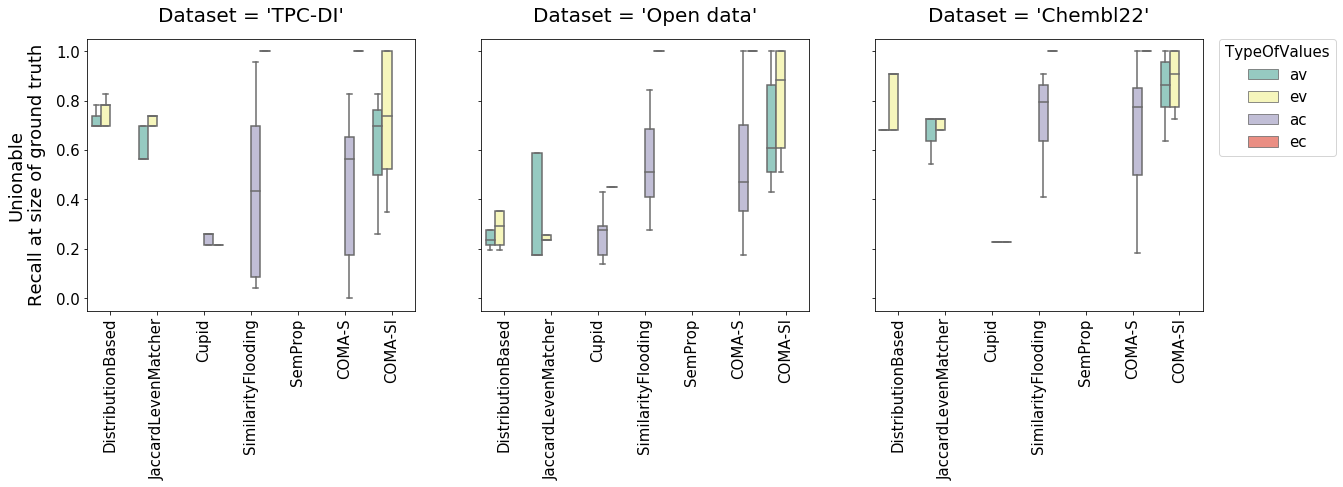

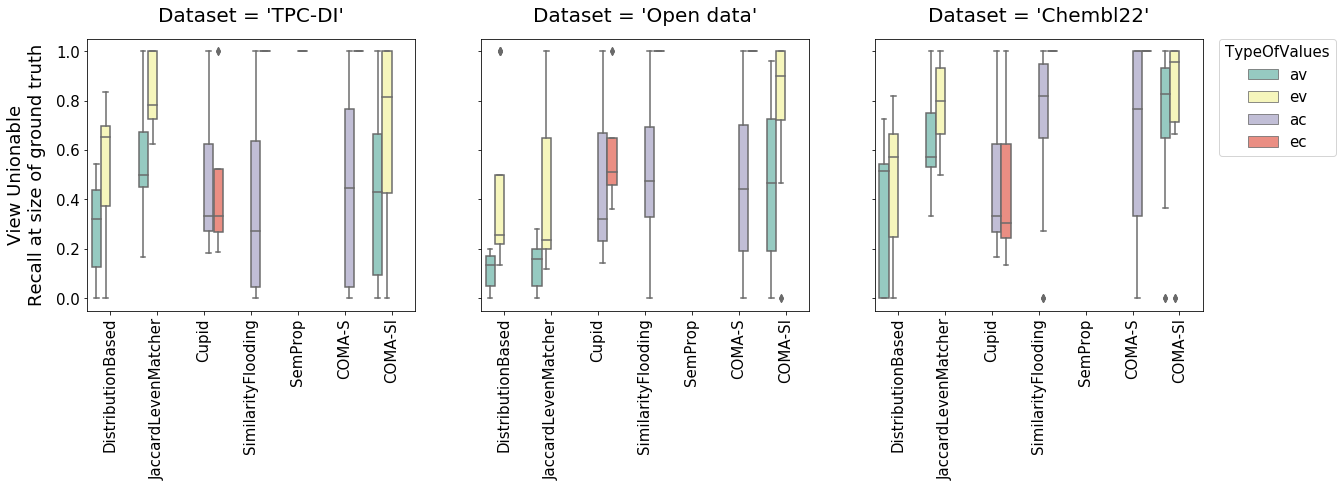

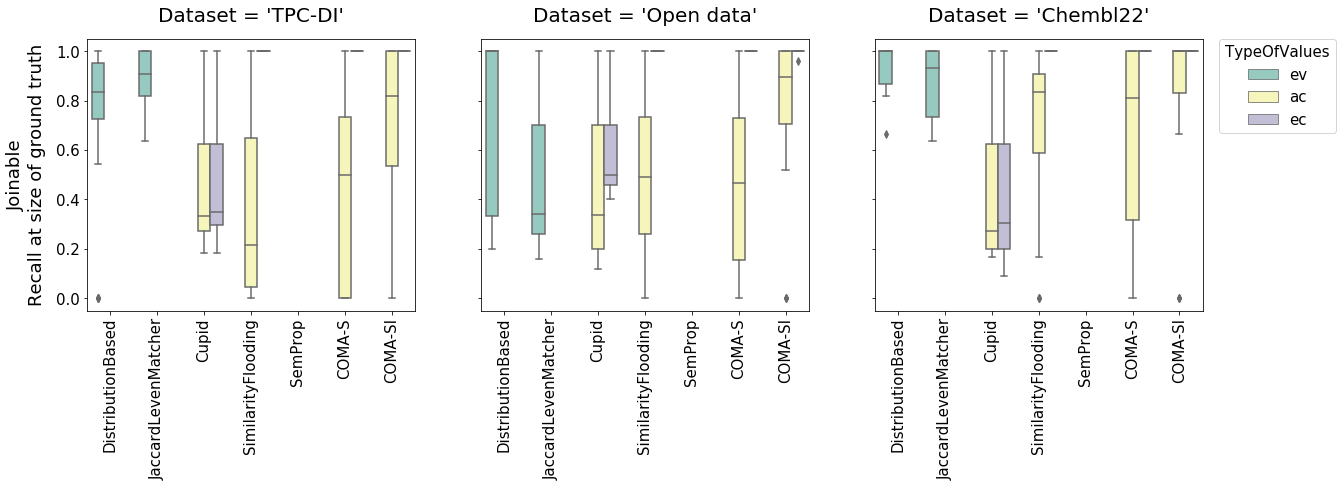

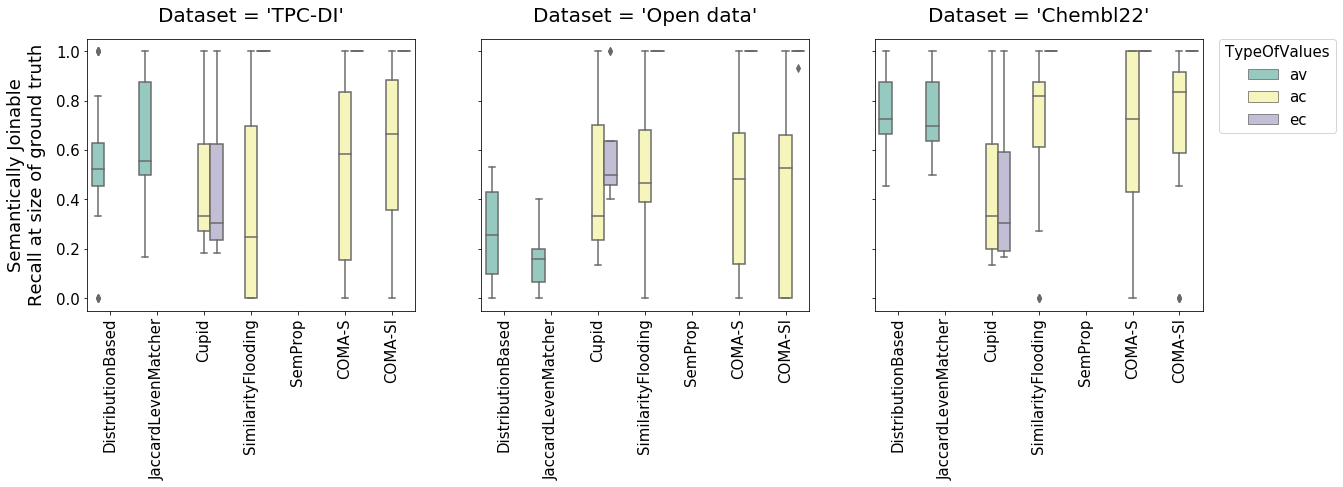

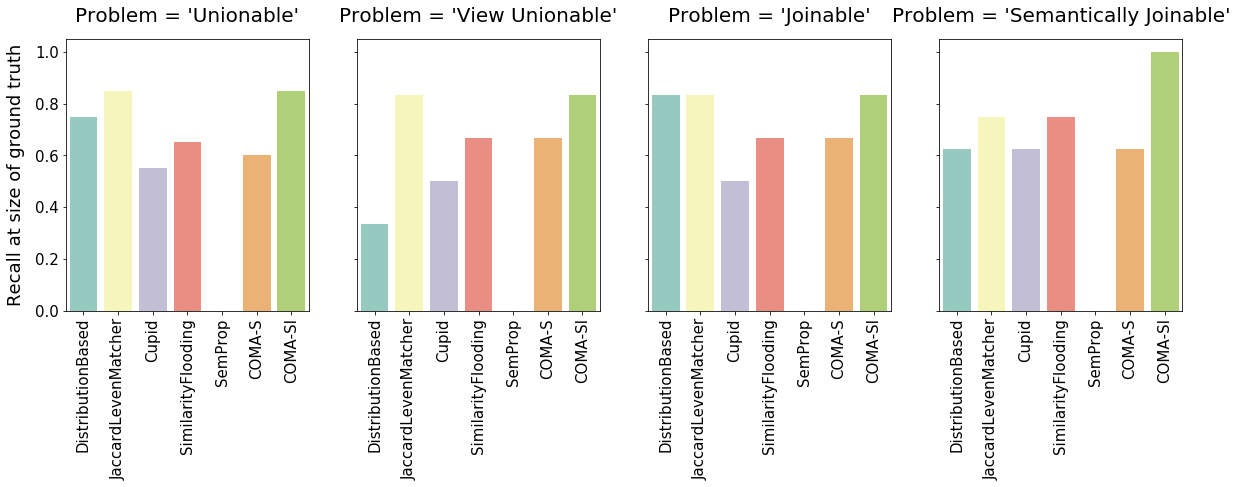

In [73]:
config = dict()
with open("config.json", "r") as fp:
    config = json.load(fp)

config = config['config']
df = None
for c in config:
    data = split_data_by_type(best_rec_gnd_pd, c)
    data['Problem'] = c['problem']
    
    if df is None:
        df = data
    else:
        df = pd.concat([df, data])
    
    make_plots(data, c['problem'])

barplots(df)

# Visualizations

## Utils

### Make average
For each dataset and variation (Joinable, Unionable etc), make the average for each algorithm (Cupid etc) based on the dataframe (precision, recall, f1-score, precision_10 etc).

__Input__: Pandas DataFrame 

__Output__: Pandas DataFrame (columns: {dataset}-{variation}, Rows: {Algorithm})

In [6]:
algs = list(algorithms.keys())

def make_average_per_dataset_variation(dataframe, metric_name):
    metrics = dict()
    variations = list(dataframe['Category'].unique())
    datasets = list(dataframe['MotherTable'].unique())
    
    for dataset in datasets:
        condition_1 = dataframe['MotherTable'] == dataset
        for variation in variations:
            condition_2 = dataframe['Category'] == variation
            df = dataframe[condition_1 & condition_2]
            column_name = "{}-{}".format(dataset, variation)
            metrics[column_name] = dict()
            metrics[column_name]['Type'] = variation
            for alg in algs:
                metrics[column_name][alg] = np.average(df[alg])
    df = pd.DataFrame.from_dict(metrics).transpose()
    df['Metric'] = metric_name
         
    return df
            

### Step 4.1: Make data

In [8]:
def make_data(dataframe, category, data, columns_to_remove):
    df = dataframe[dataframe['Category'] == category]
    if data is not None:
        df = df[df['MotherTable'] == data]
    df1 = df.drop(columns_to_remove, axis=1)
    if data is not None:
        df1 = pd.melt(df1, ['TypeOfValues'], var_name="Algorithms")
    else:
        df1 = pd.melt(df1, ['TypeOfValues', 'MotherTable'], var_name="Algorithms")
    return df1


In [48]:
prec_metrics_df = make_average_per_dataset_variation(best_prec_pd, "Precision-1-1")
rec_metrics_df = make_average_per_dataset_variation(best_recall_pd, "Recall-1-1")
f1_metrics_df = make_average_per_dataset_variation(best_f1_pd, "F1-1-1")
prec10_metrics_df = make_average_per_dataset_variation(best_prec10_pd, "Precision-10")
prec20_metrics_df = make_average_per_dataset_variation(best_prec20_pd, "Precision-20")
prec30_metrics_df = make_average_per_dataset_variation(best_prec30_pd, "Precision-30")
prec40_metrics_df = make_average_per_dataset_variation(best_prec40_pd, "Precision-40")
prec50_metrics_df = make_average_per_dataset_variation(best_prec50_pd, "Precision-50")
prec60_metrics_df = make_average_per_dataset_variation(best_prec60_pd, "Precision-60")
prec70_metrics_df = make_average_per_dataset_variation(best_prec70_pd, "Precision-70")
prec80_metrics_df = make_average_per_dataset_variation(best_prec80_pd, "Precision-80")
prec90_metrics_df = make_average_per_dataset_variation(best_prec90_pd, "Precision-90")


metrics = pd.concat([prec_metrics_df, rec_metrics_df, f1_metrics_df, prec10_metrics_df, 
                    prec20_metrics_df, prec30_metrics_df, prec40_metrics_df, prec50_metrics_df,
                    prec60_metrics_df, prec70_metrics_df, prec80_metrics_df, prec90_metrics_df])
# metrics = metrics.reset_index(level=0, inplace=False)


# for index, key in enumerate(list(metrics_p11['index'].unique())):
#     metrics_p11.loc[metrics_p11['index'] == key, 'index'] = index
# metrics_p11 = metrics_p11.drop('Metric', axis=1)
# metrics_p11 = pd.melt(metrics_p11, 'index', var_name="algorithms")



## ScatterPlots

### Precision for each dataset and each algorithm

In [245]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams.update({'font.size': 52,
                    'figure.figsize': [15.0,10.0]
                    })

metrics_index = metrics.reset_index(level=0, inplace=False)
# x = list(range(len(list(metrics_index['index'].unique()))))
x = list(metrics_index['index'].unique())

colors = cm.rainbow(np.linspace(0, 1, 6))
filled_markers = ['o', 'v', 'd', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i, alg in enumerate(algs):
    plt.scatter(x, metrics_index[metrics_index['Metric'] == 'Precision-1-1'][alg], c=colors[i], 
                marker=filled_markers[i], s=100, label=alg)

plt.legend()
plt.title('Precision for each dataset and each algorithm')
plt.xticks(rotation=90)
plt.ylabel('Precision 1-1')

KeyError: 'CP'

## Violinplot

### Make data

### Multiple Violinplots

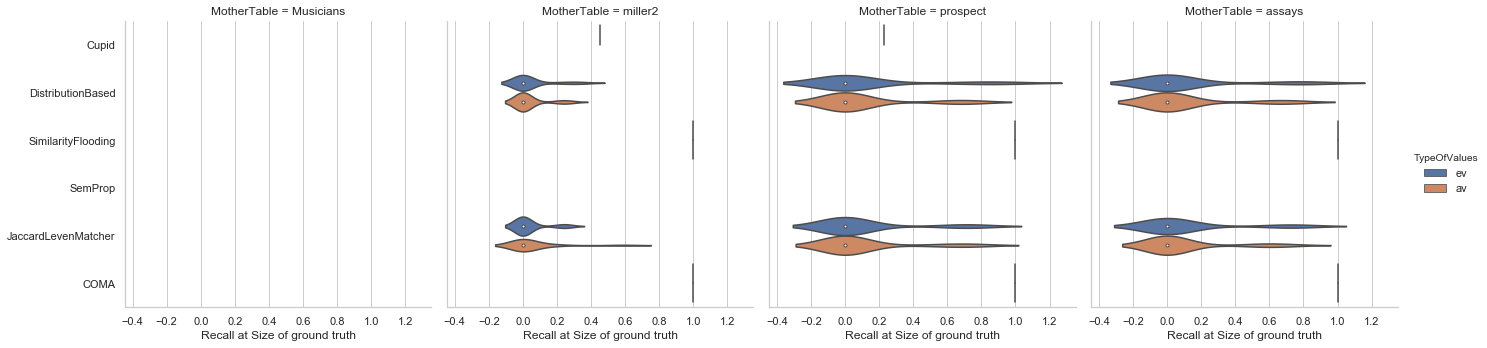

In [80]:
import seaborn as sns
sns.set(style="whitegrid")

columns_multi = ['Category', 'SplitMethod', 'HorizontalOverlap', 'VerticalOverlap', 'ColumnNames', 'Dataset']
unionable = make_data(best_rec_gnd_pd, 'Unionable', None, columns_multi)

g = sns.catplot(x="value", y="Algorithms", hue="TypeOfValues", col="MotherTable", 
            data=unionable, kind="violin", split=False, height=5, aspect=1)
g.set_axis_labels("Recall at Size of ground truth", "")

### Violinplot

[Text(0, 0, 'Cupid'),
 Text(0, 0, 'DistributionBased'),
 Text(0, 0, 'SimilarityFlooding'),
 Text(0, 0, 'SemProp'),
 Text(0, 0, 'JaccardLevenMatcher'),
 Text(0, 0, 'COMA')]

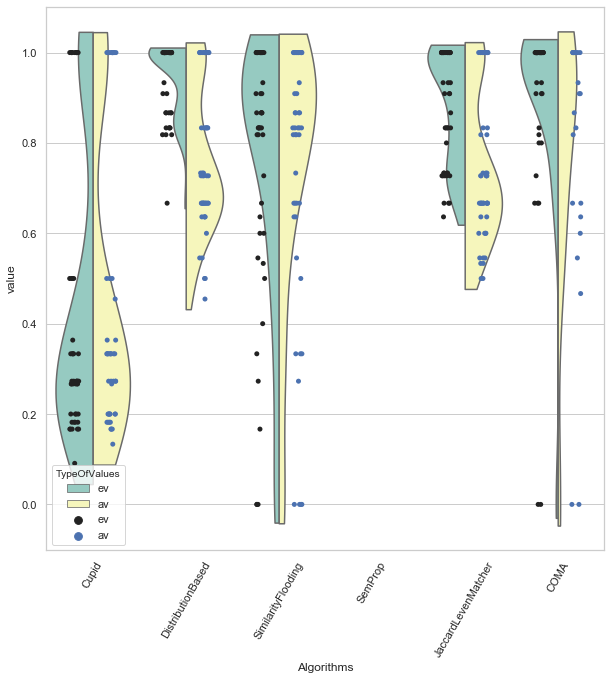

In [147]:
columns_violin = ['Category', 'SplitMethod', 'HorizontalOverlap', 'VerticalOverlap',
                  'ColumnNames', 'Dataset', 'MotherTable']
unionable_prospect = make_data(best_rec_gnd_pd, 'Joinable', 'prospect', columns_violin)
unionable_miller = make_data(best_rec_gnd_pd, 'Unionable', 'miller2', columns_violin)
unionable_musicians = make_data(best_rec_gnd_pd, 'Unionable', 'Musicians', columns_violin)
# unionable_chembl = make_data_violin(best_rec_gnd_pd, 'Unionable', 'chembl', columns)

plt.rcParams.update({'font.size': 72,
                    'figure.figsize': [10.0,10.0]
                    })
ax = sns.violinplot(x="Algorithms", y="value", hue="TypeOfValues", data=unionable_prospect, 
               palette="Set3", split=True, scale="count", inner=None, cut=.3)
sns.stripplot(x="Algorithms", y="value", hue="TypeOfValues", data=unionable_prospect, orient='v', dodge=True, color='b')
ax.set_xticklabels(algs, rotation=60)

[Text(0, 0, 'CP'),
 Text(0, 0, 'DB'),
 Text(0, 0, 'SF'),
 Text(0, 0, 'SP'),
 Text(0, 0, 'JL'),
 Text(0, 0, 'CO')]

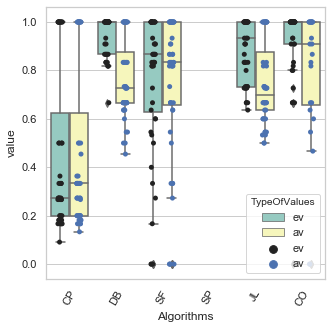

In [162]:
plt.rcParams.update({'font.size': 50, 'figure.figsize': [5.0,5.0]})

ax = sns.boxplot(x="Algorithms", y="value", hue="TypeOfValues", data=unionable_prospect, 
               palette="Set3")
algs= ['CP', 'DB', 'SF', 'SP', 'JL', 'CO']
sns.stripplot(x="Algorithms", y="value", hue="TypeOfValues", data=unionable_prospect, orient='v', dodge=True, color='b')
ax.set_xticklabels(algs, rotation=60)

[Text(0, 0, 'Cupid'),
 Text(0, 0, 'DistributionBased'),
 Text(0, 0, 'SimilarityFlooding'),
 Text(0, 0, 'SemProp'),
 Text(0, 0, 'JaccardLevenMatcher'),
 Text(0, 0, 'COMA')]

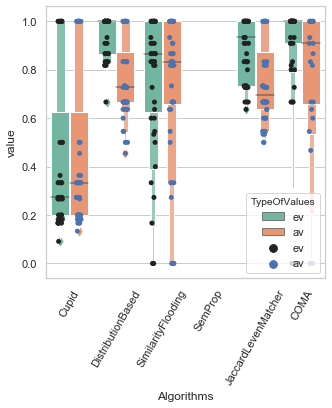

In [154]:
plt.rcParams.update({'figure.figsize': [5.0,5.0]})

ax = sns.boxenplot(x="Algorithms", y="value", hue="TypeOfValues", data=unionable_prospect, 
               palette="Set2")
sns.stripplot(x="Algorithms", y="value", hue="TypeOfValues", data=unionable_prospect, orient='v', dodge=True, color='b')
ax.set_xticklabels(algs, rotation=60)


## Boxplot

### Multiple boxplots - horizontal

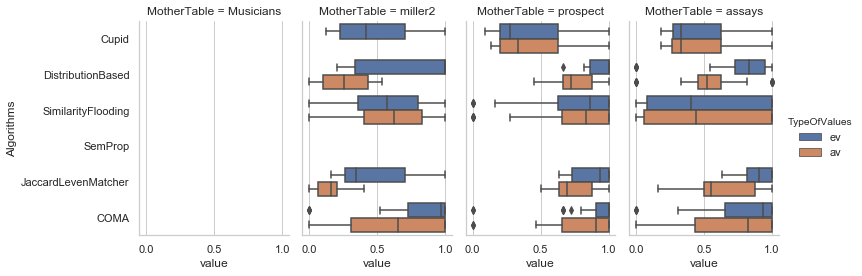

In [117]:
sns.set(style="whitegrid")

columns_multi = ['Category', 'SplitMethod', 'HorizontalOverlap', 'VerticalOverlap', 'ColumnNames', 'Dataset']
unionable = make_data(best_rec_gnd_pd, 'Joinable', None, columns_multi)

g = sns.catplot(x="value", y="Algorithms",
                hue="TypeOfValues", col="MotherTable",
                data=unionable, kind="box",
                height=4, aspect=.7);

### Multiple boxplots - vertical

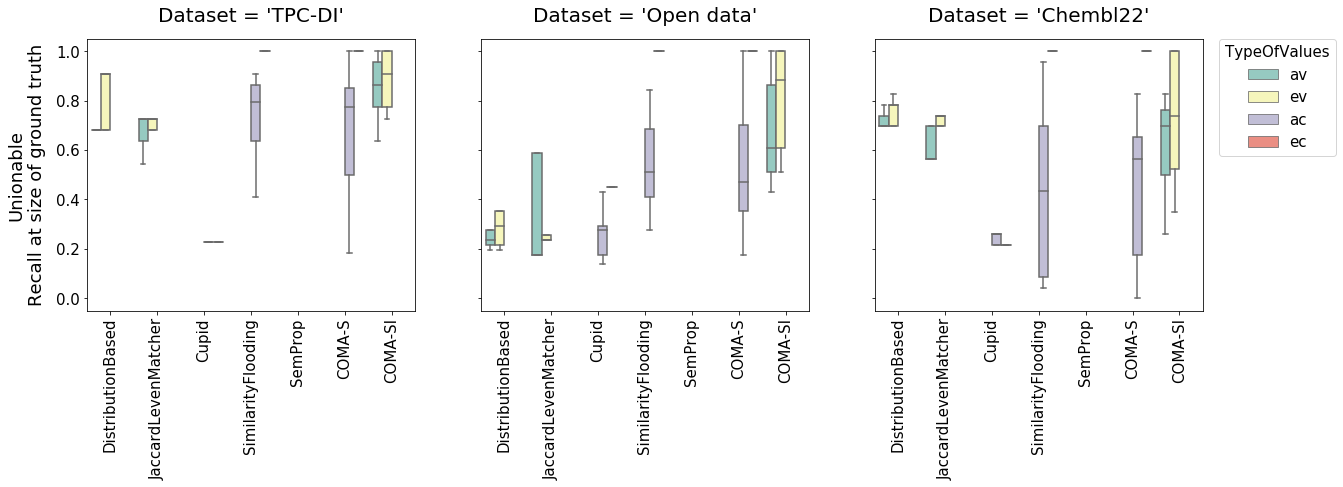

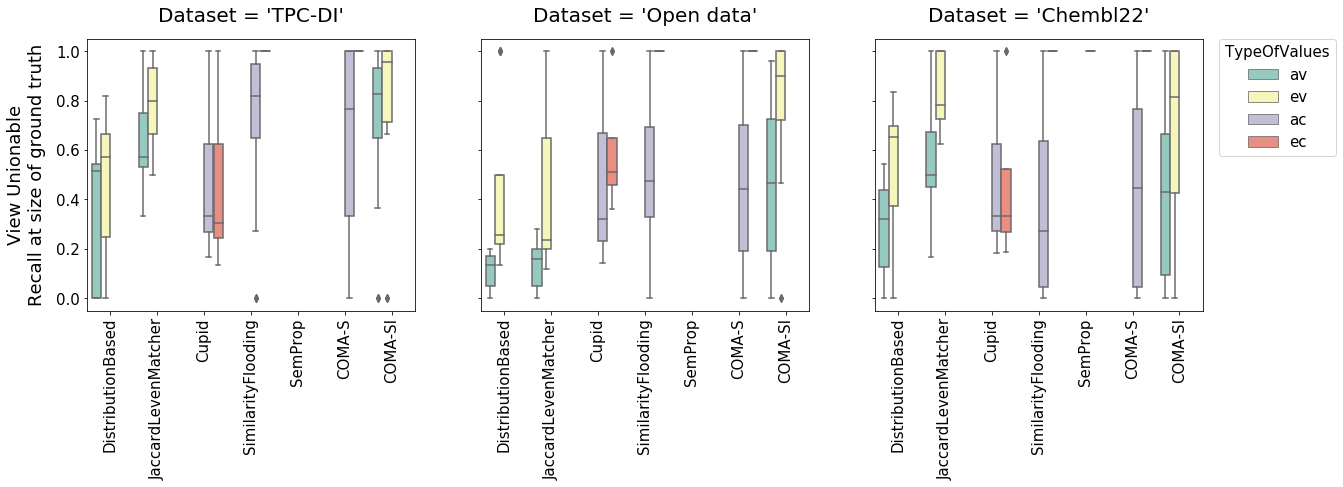

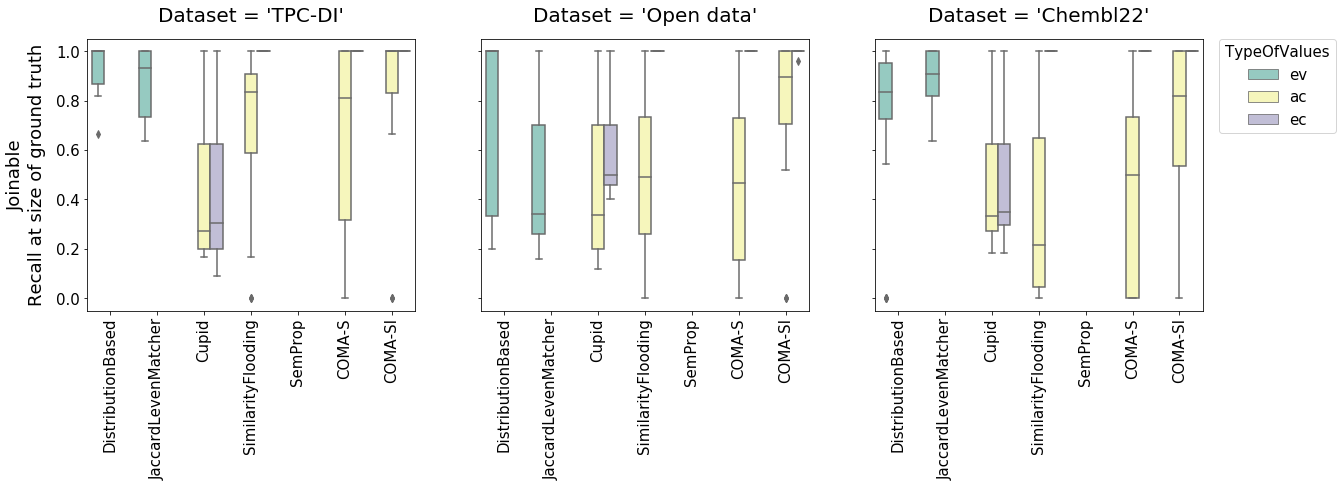

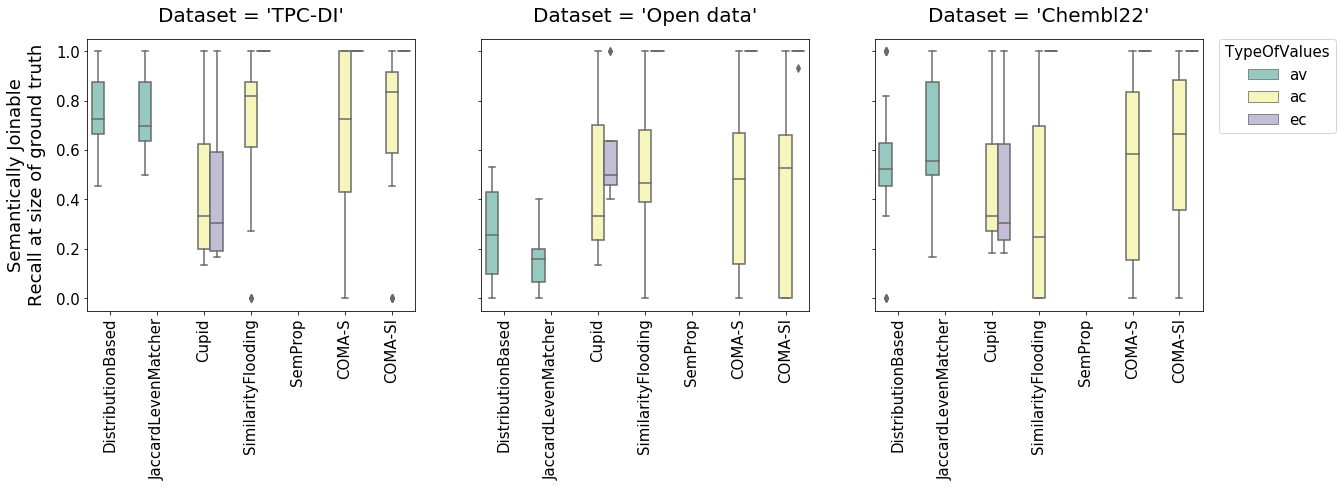

In [12]:
config = dict()
with open("config.json", "r") as fp:
    config = json.load(fp)

config = config['config']
for c in config:
    make_plots(split_data_by_type(best_rec_gnd_pd, c), c['problem'])
# data = split_data_by_type(best_rec_gnd_pd, config[0])
# display(data[data['Algorithms'] == 'COMA-SI'])
# make_plots(data,  'Unionable')
# prospect = data[data['MotherTable'] == 'prospect']

# sns.boxplot(x="Algorithms", y="value", hue="SplitType", data=prospect, palette="Set3")

## Stripplot

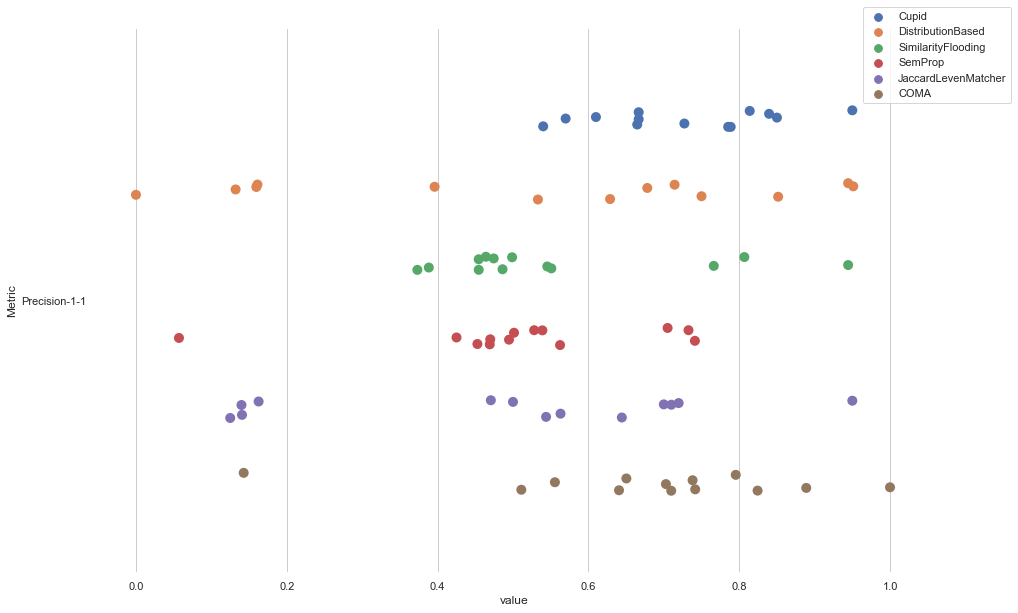

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# display(metrics)
metrics_melt = pd.melt(metrics, ['Metric', 'Type'], var_name="algorithms")
# metrics_melt = pd.concat([metrics_melt[(metrics_melt['Metric']=="F1-1-1")], 
#                           metrics_melt[(metrics_melt['Metric']=="Precision-1-1")]])
metrics_melt = metrics_melt[(metrics_melt['Metric']=="Precision-1-1")]

# display(metrics_melt)
sns.set(style="whitegrid")
# Initialize the figure
plt.rcParams.update({'font.size': 52,
                    'figure.figsize': [15.0,10.0]
                    })
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="Metric", hue="algorithms",
              data=metrics_melt, dodge=True, alpha=1, zorder=1, size=10)

ax.legend(bbox_to_anchor=(1.1, 1.05))

## HeatMap

### Precision Heatmap 

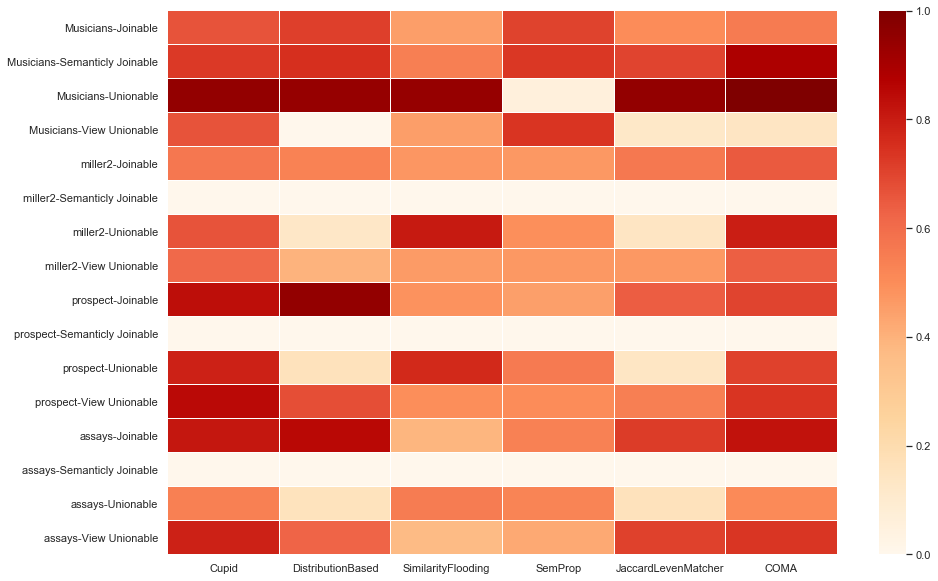

In [66]:
precision_heatmap = metrics[metrics['Metric']=='Precision-1-1'].drop(['Metric', 'Type'], axis=1).fillna(0)
# display(precision_heatmap)
ax = sns.heatmap(precision_heatmap, linewidths=.2, cmap="OrRd")

### Recall Heatmap

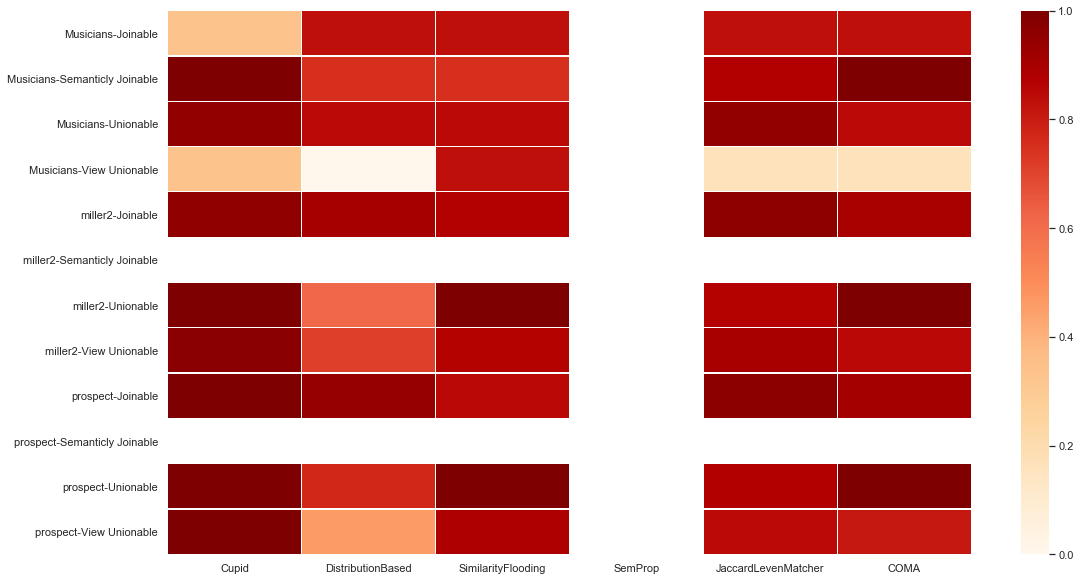

In [39]:
df = metrics[metrics['Metric']=='Recall-1-1'].drop('Metric', axis=1)
ax = sns.heatmap(df, linewidths=.2, cmap="OrRd")

# Create Per Problem Average Dataframe

Code below creates a dictionary with the average value per problem for each algorithm. For the 1-1 matches the F1_score/measure is the metric used. For the N-M matches recall at size of groundtruth is used.

In [12]:
import numpy as np

problems = {
    'Unionable 1-1': copy.deepcopy(algorithms),
    'ViewUnionable 1-1': copy.deepcopy(algorithms),
    'Joinable 1-1': copy.deepcopy(algorithms),
    'SemanticlyJoinable 1-1': copy.deepcopy(algorithms),
    'Unionable N-M': copy.deepcopy(algorithms),
    'ViewUnionable N-M': copy.deepcopy(algorithms),
    'Joinable N-M': copy.deepcopy(algorithms),
    'SemanticlyJoinable N-M': copy.deepcopy(algorithms)
}

helper = {
    "Cupid_fmeasure": None,
    "SimilarityFlooding_fmeasure": None,
    "DistributionBased_fmeasure": None,
    "JaccardLevenMatcher_fmeasure": None,
    "SemProp_fmeasure": None,
    "COMA_fmeasure": None,
    "Cupid_rgnd": None,
    "SimilarityFlooding_rgnd": None,
    "DistributionBased_rgnd": None,
    "JaccardLevenMatcher_rgnd": None,
    "SemProp_rgnd": None,
    "COMA_rgnd": None
}

problem_dictionary = {
    'Unionable': ['horizontal'],
    'ViewUnionable': ['both_0_'],
    'Joinable': ['both_50_', 'vertical'],
    'SemanticlyJoinable': ['both_50_', 'vertical']
}

for key in algorithms.keys():
    for problem in problems.keys():
        if problem.split(' ')[1] == '1-1':
            helper[key+'_fmeasure'] = best_f1_pd[['Dataset',key]].copy()
            temp = []
            values = []
            for index,dataset in helper[key+'_fmeasure'].loc[:,['Dataset']].iterrows():
                for ss in problem_dictionary[problem.split(' ')[0]]:
                    if ss in dataset['Dataset']:
                        temp.append(index)
            values = helper[key+'_fmeasure'].loc[temp,[key]]
            problems[problem][key] = np.average(values)
        else:
            helper[key+'_rgnd'] = best_rec_gnd_pd[['Dataset',key]].copy()
            temp = []
            values = []
            for index,dataset in helper[key+'_rgnd'].loc[:,['Dataset']].iterrows():
                for ss in problem_dictionary[problem.split(' ')[0]]:
                    if ss in dataset['Dataset']:
                        temp.append(index)
            values = helper[key+'_rgnd'].loc[temp,[key]]
            problems[problem][key] = np.average(values)

        
#         print(problem, key, problems[problem][key])
   
    
    
# Copy paste the code below to create a similar pandas dataframe 
# with the algorithm as a row and the problems as columns, based on F1_score and recall @ size of groundtruth.
temp = {}
for problem in problems.keys():
    temp[problem] = problems[problem]['Cupid']
cupid_radar_pd = pd.DataFrame.from_dict(temp, orient='index', columns=['Cupid']).T
display(cupid_radar_pd)

temp = {}
for problem in problems.keys():
    temp[problem] = problems[problem]['DistributionBased']
distribution_radar_pd = pd.DataFrame.from_dict(temp, orient='index', columns=['DistributionBased']).T
display(distribution_radar_pd)



,Unionable 1-1,ViewUnionable 1-1,Joinable 1-1,SemanticlyJoinable 1-1,Unionable N-M,ViewUnionable N-M,Joinable N-M,SemanticlyJoinable N-M
Cupid,1.0,0.820618,0.814455,0.814455,0.339127,0.481604,0.473037,0.473037


,Unionable 1-1,ViewUnionable 1-1,Joinable 1-1,SemanticlyJoinable 1-1,Unionable N-M,ViewUnionable N-M,Joinable N-M,SemanticlyJoinable N-M
DistributionBased,0.75854,0.54019,0.817713,0.817713,0.559913,0.446149,0.843635,0.843635


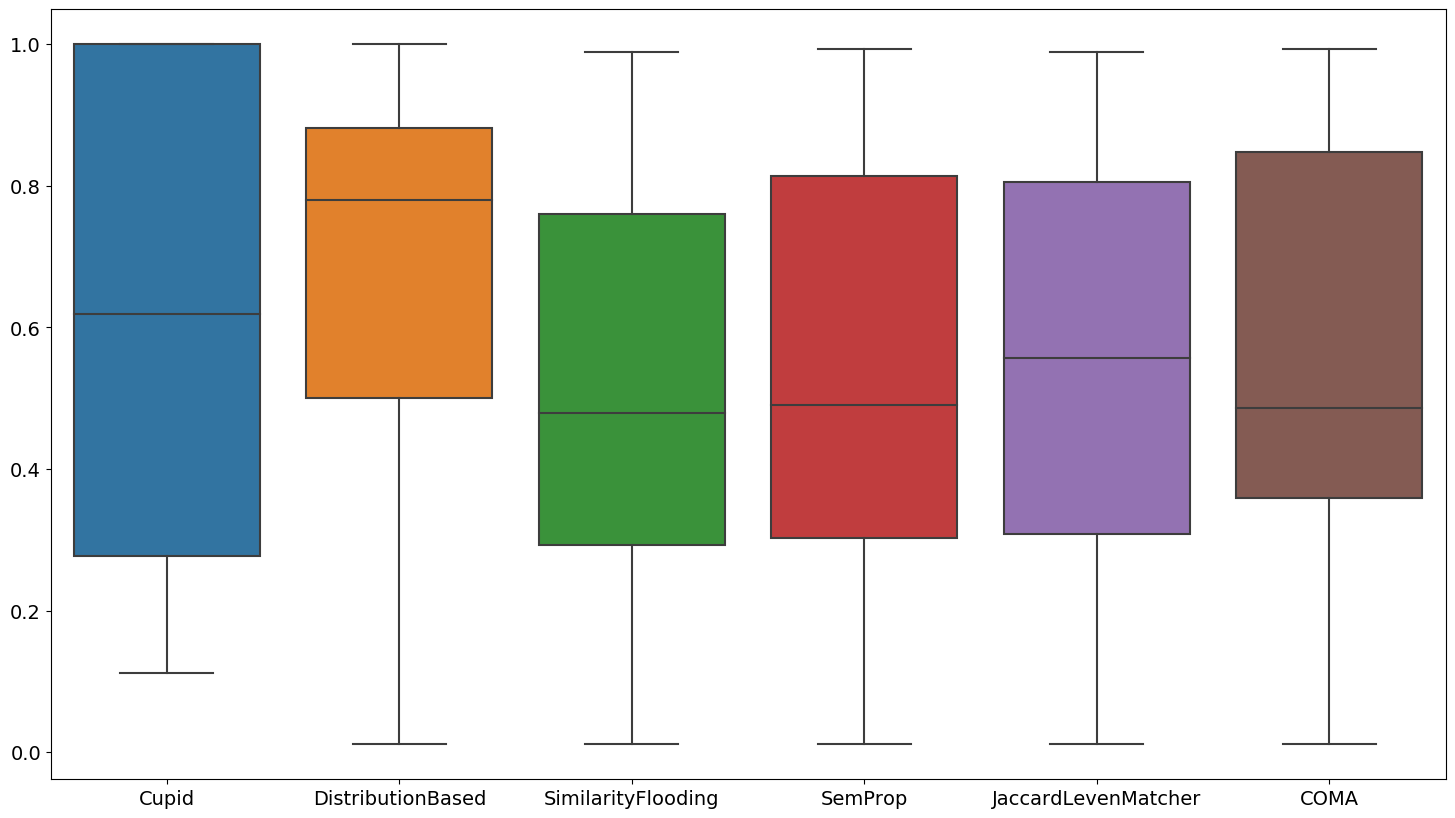

In [129]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
from math import pi

import seaborn as sns

plt.rcdefaults()
plt.rcParams.update({'font.size': 14,
                    'figure.figsize': [18.0,10.0]
                    })


g = sns.boxplot(data=best_prec_pd)

#g = sns.catplot(x="fare", y="survived", row="class",
#                kind="box", orient="h", height=1.5, aspect=4,
#                data=titanic.query("fare > 0"));

In [130]:
def realign_polar_xticks(ax):
    for theta, label in zip(ax.get_xticks(), ax.get_xticklabels()):
        theta = theta * ax.get_theta_direction() + ax.get_theta_offset()
        theta = np.pi/2 - theta
        y, x = np.cos(theta), np.sin(theta)
        if x >= 0.1:
            label.set_horizontalalignment('left')
        if x <= -0.1:
            label.set_horizontalalignment('right')
        if y >= 0.5:
            label.set_verticalalignment('bottom')
        if y <= -0.5:
            label.set_verticalalignment('top')

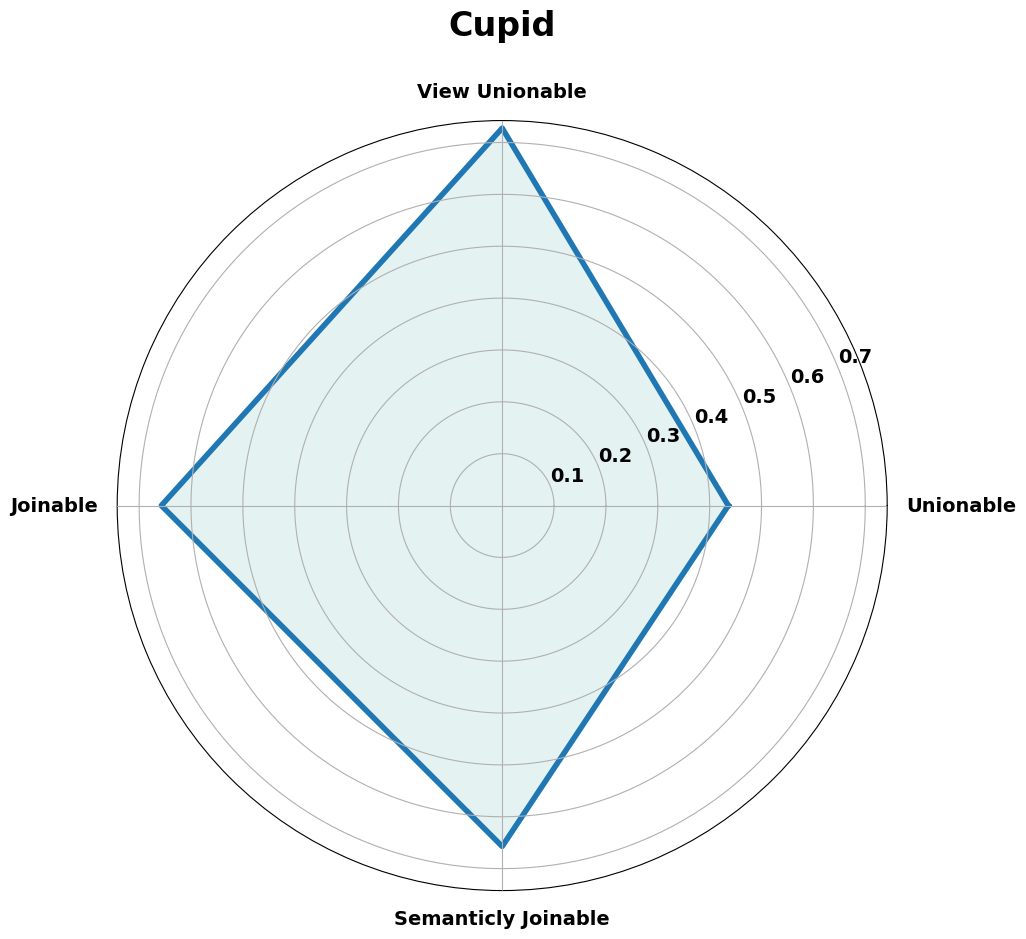

In [142]:
Attributes =list(cupid_radar_pd)
AttNo = len(Attributes)
values = cupid_radar_pd.iloc[0].tolist()
values += values [:1]
values

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]
# plt.rcdefaults()
plt.rcParams.update({
    'font.size': 14, 
    'axes.titlesize' : 24, 
    'font.weight': 'bold', 
    'axes.titleweight': 'bold',
    'lines.linewidth': 4,
    'axes.axisbelow': False,
    'figure.figsize': [10.0,10.0]
})

                 
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title('Cupid\n')
realign_polar_xticks(ax)

plt.show()

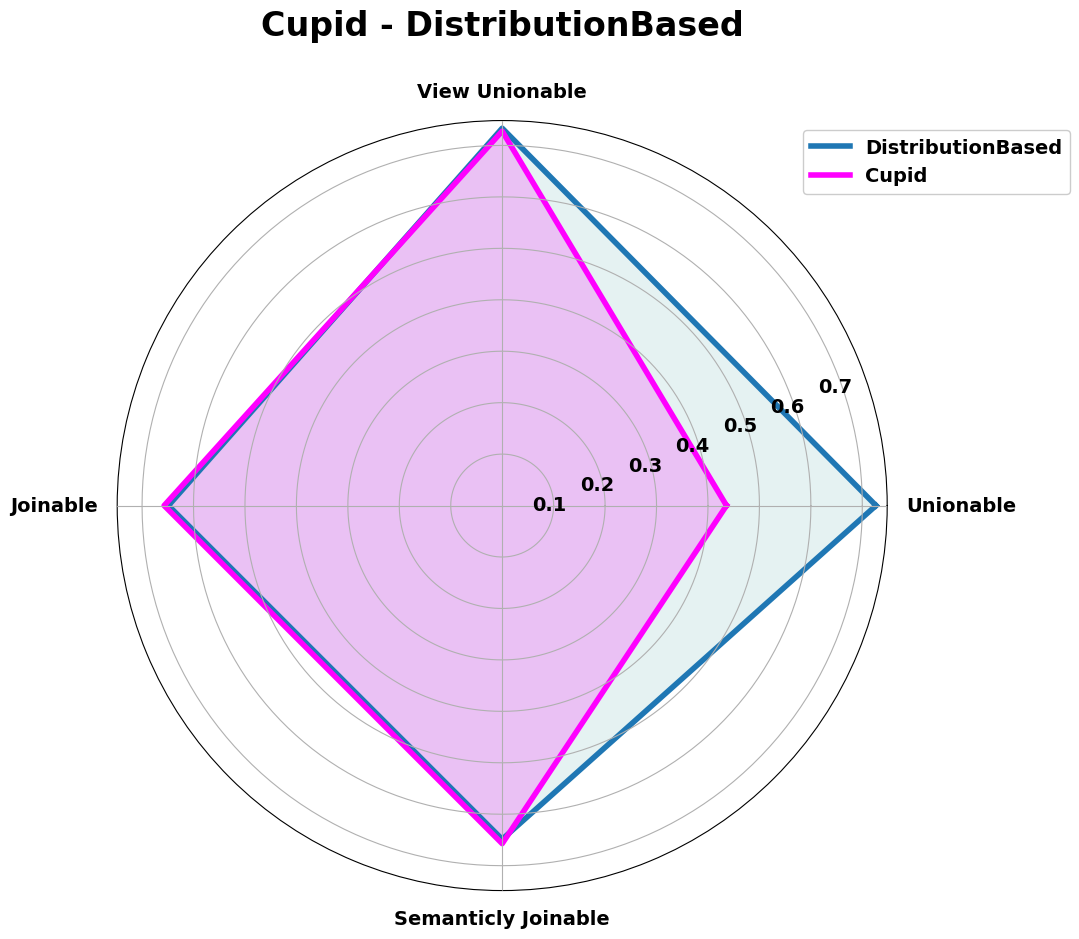

In [127]:
values2 = distribution_radar_pd.iloc[0].tolist()
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

fig = plt.figure(figsize=(18,10))
plt.rcParams["axes.axisbelow"] = False
plt.rcParams['font.weight'] = 'bold'

ax = plt.subplot(111, polar=True, figure=fig)
#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
l, = ax.plot(angles2,values2)
n, = ax.plot(angles,values, c='magenta')

#Fill in the area plotted in the last line
ax.fill(angles2, values2, 'teal', alpha=0.1, label='DistributionBased')
ax.fill(angles,values,'magenta', alpha=0.2, label='Cupid')

ax.legend(handles= [l,n],labels=['DistributionBased','Cupid'] ,loc='best', bbox_to_anchor=(0.75, 0.5, 0.5, 0.5), framealpha=1)

#Give the plot a title and show it
ax.set_title('Cupid - DistributionBased\n')
realign_polar_xticks(ax)

plt.show()
